# Data Wrangling

In [218]:
#dependências do projeto
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

#dataframe com as estatísticas
df = pd.read_csv('players_stats_16-02-2019.csv', sep=';', dtype=object)
#dataframe do dicionário de dados
df_dict = pd.read_csv('data_dictionary.csv', sep=';', encoding='cp1252')
#mostrar todas as colunas quando printar o dataframe
pd.options.display.max_columns = None
df.shape

(101, 169)


## Limpeza

### 1.  Retirar parênteses ( das linhas

In [219]:
columns = ['Age', 'Current_Rank', 'Best_Rank', 'Current_Elo_Rank', 'Best_Elo_Rank', 'Pick_Elo_Rank', 'Goat_Rank', 'Hard', 'Clay',
           'Grass', 'Carpet', 'Grand_Slam.1', 'Tour_Finals', 'Masters.1', 'Olympics', 'ATP_500', 'ATP_250', 'Davis_Cup', 
           'Deciding_Set', 'Fifth_Set', 'After_Winning_1st_Set', 'After_Losing_1st_Set', 'Tie-Breaks', 'Deciding_Set_Tie-Breaks',
           'Outdoor', 'Indoor', 'Best_of_3', 'Best_of_5', 'Vs_No._1', 'Vs_Top_5', 'Vs_Top_10', 'Vs_Top_20', 'Vs_Top_50',
           'Vs_Top_100', 'Final', 'For_Bronze_Medal', 'Semi-Final', 'Quarter-Final', 'Round_of_16', 'Round_of_32', 'Round_of_64',
           'Round_of_128', 'Round-Robin', 'Very_Fast', 'Fast', 'Medium_Fast', 'Medium', 'Medium_Slow', 'Slow', 'Very_Slow',
           'Best_of_3:_2:0', 'Best_of_3:_2:1', 'Best_of_3:_1:2', 'Best_of_3:_0:2', 'Best_of_5:_3:0', 'Best_of_5:_3:1', 
           'Best_of_5:_3:2', 'Best_of_5:_2:3', 'Best_of_5:_1:3', 'Best_of_5:_0:3']

for column in columns:
    df[column] = df[column].str.split('(')
    df[column] = df[column].str[0]

### 2. Retirar porcentagem % das colunas

In [220]:
for column in df:
    if (df[column].dtype == np.object):    
        df[column] = df[column].str.replace('%', '')
        df[column] = df[column].str.strip()

### 3. Retirar 'kg' da coluna Height e 'cm' da coluna Weight

In [221]:
df['Height'] = df['Height'].str.replace('kg', '')
df['Weight'] = df['Weight'].str.replace('cm', '')

### 4. Drop de colunas Active e Seasons
Motivo: Seasons está NaN para todas / Active está YES para todos

In [222]:
df.drop(columns=['Seasons', 'Active'], inplace=True)

### 5. Converter coluna Prize Money para número inteiro
Exemplo: Entrada *US$ 125,772,589 All-time leader in earnings* | Saída 

In [223]:
#remove moeda
df['Prize_Money'] = df['Prize_Money'].str.split('$')
df['Prize_Money'] = df['Prize_Money'].str[1]
#remove espaço do inicio
df['Prize_Money'] = df['Prize_Money'].str.lstrip()
#divide entre número e anotações
df['Prize_Money'] = df['Prize_Money'].str.split(' ')
df['Prize_Money'] = df['Prize_Money'].str[0]
#remove vírgula
df['Prize_Money'] = df['Prize_Money'].str.replace(',', '')

In [224]:
df.head(5)

,Player_id,Player,Age,Country,Height,Weight,Plays,Backhand,Turned_Pro,Prize_Money,Titles,Grand_Slam,Masters,Finals,Current_Rank,Best_Rank,Current_Elo_Rank,Best_Elo_Rank,Pick_Elo_Rank,Goat_Rank,Hard,Clay,Grass,Carpet,Grand_Slam.1,Tour_Finals,Masters.1,Olympics,ATP_500,ATP_250,Davis_Cup,Deciding_Set,Fifth_Set,After_Winning_1st_Set,After_Losing_1st_Set,Tie-Breaks,Deciding_Set_Tie-Breaks,Outdoor,Indoor,Best_of_3,Best_of_5,Vs_No._1,Vs_Top_5,Vs_Top_10,Vs_Top_20,Vs_Top_50,Vs_Top_100,Final,For_Bronze_Medal,Semi-Final,Quarter-Final,Round_of_16,Round_of_32,Round_of_64,Round_of_128,Round-Robin,Very_Fast,Fast,Medium_Fast,Medium,Medium_Slow,Slow,Very_Slow,Best_of_3:_2:0,Best_of_3:_2:1,Best_of_3:_1:2,Best_of_3:_0:2,Best_of_5:_3:0,Best_of_5:_3:1,Best_of_5:_3:2,Best_of_5:_2:3,Best_of_5:_1:3,Best_of_5:_0:3,2nd_Serve_Won_%,Pts._Won_per_Rtn._Game,Upsets,2nd_Srv._Return_Won_%,Sets_Played,Point_Time_(seconds),Pts._to_Sets_Over-Perf.,Double_Faults,Total_Points_Won,Tie-Breaks_Played,Tie-Breaks_Won,Opponent_Rank,Games_Dominance,R._Pts._to_R._Gms._Ov.-Perf.,Service_Games_Won_%,Opponent_Elo_Rating,Matches_Played,Upsets_scored,Double_Faults_Against,Gms._to_Matches_Ov.-Perf.,Rtn._In-play_Pts._Won_%,Game_Time_(minutes),1st_Serve_%,BPs_per_Return_Game,1st_Serve_Won_%,Pts._to_Gms._Over-Perf.,Gms._to_Sets_Over-Perf.,Points_per_Service_Game,BPs_per_Svc._Game,Total_Games_Won,Break_Points_Saved_%,Upsets_scored_%,DFs_per_Set,Ace_%,Svc._In-play_Pts._Won_%,Sets_to_Matches_Ov.-Perf.,Total_Games_Played,Games_per_Set,Tie-Breaks_per_Match,S._Pts._to_S._Gms._Ov.-Perf.,Aces_per_Match,Sets_Won_%,Points_Dominance,Break_Points_Won_%,Rtn._to_Svc._Points_Ratio,Match_Time,Tie-Breaks_Won_%,Return_Games_Won_%,Svc._Gms._Lost_per_Set,DFs_per_Match,Set_Time_(minutes),DFs_per_2nd_Serve_%,Service_Points_Won_%,Rtn._Gms._Won_per_Match,Tie-Breaks_per_Set_%,Matches_Won,Sets_Won,Pts._to_TBs._Over-Perf.,Upsets_%,Pts._to_Matches_Over-Perf.,Double_Fault_Against_%,Rtn._Gms._Won_per_Set,Return_Points_Won_%,BPs_Over-Performing,Aces_per_Svc._Game,Points_per_Set,Ace_Against_%,Aces_/_DFs_Ratio,Games_per_Match,Upsets_against,Total_Points_Played,Games_Won_%,Double_Fault_%,Matches_Won_%,Ace_Against,Break_Points_Ratio,DFs_per_Svc._Game,Upsets_against_%,Points_per_Return_Game,BPs_Faced_per_Set,Aces_per_Set,Points_per_Match,Points_per_Game,BPs_Faced_per_Match,Sets_per_Match,Svc._Gms._Lost_per_Match,1st_Srv._Return_Won_%,BPs_Saved_Over-Perf.,Pts._Lost_per_Svc._Game,Aces,Total_Points_Won_%,BPs_per_Set,BPs_per_Match,BPs_Conv._Over-Perf.
0,4920,Novak Djokovic,31,Serbia,77,188,Right-handed,Two-handed,2003,125772589,73,15,32,5,1,1,1,1,2629,2,84.3,79.4,83.0,69.2,86.6,74.5,82.0,69.2,85.7,77.2,81.6,74.3,76.3,96.1,42.5,63.3,71.4,83.9,76.5,81.2,86.0,43.3,60.3,68.8,72.2,79.0,81.8,68.6,50.0,72.7,82.5,87.2,90.1,86.8,94.8,74.3,83.1,81.9,82.8,86.4,83.7,73.8,75.7,60.0,21.5,7.6,11.0,57.9,20.4,9.0,2.8,5.0,5.0,55.5,2.80,179,55.2,2693,41.6,1.39,2212,84535,368,233,23,2.25,0.76,85.7,2044,1022,58,2769,1.40,42.8,4.45,64.9,0.73,73.4,1.09,1.28,6.18,0.41,15036,65.4,5.7,0.86,7.0,66.7,1.09,25396,9.43,0.36,1.28,5.4,75.8,1.28,44.2,1.05,1:49,63.3,32.2,0.68,2.3,42.0,8.3,67.1,3.9,13.7,846,2041,1.16,17.5,1.52,3.5,1.49,42.2,0.96,0.43,60.4,6.2,2.39,24.8,121,155526,59.2,2.9,82.8,4948,1.28,0.18,11.9,6.65,1.98,2.06,158.2,6.41,5.2,2.64,1.8,33.6,0.98,2.03,5296,54.4,3.38,8.8,1.05
1,4742,Rafael Nadal,32,Spain,85,185,Left-handed,Two-handed,2001,,80,17,33,NaN,2,1,2,1,2552,3,77.4,92.0,77.6,25.0,87.2,55.2,82.5,83.3,87.2,74.1,96.0,68.6,65.6,95.0,42.8,61.0,52.9,84.8,65.4,80.9,87.9,51.4,59.7,65.3,71.6,77.5,82.0,68.4,0.0,76.3,76.6,88.9,89.4,88.7,96.4,63.6,73.7,77.1,77.3,85.2,89.8,93.2,94.2,63.9,17.4,7.8,11.0,63.7,18.0,6.8,3.5,3.9,4.2,57.3,2.79,195,55.3,2843,44.9,1.42,1717,89229,372,227,27,2.31,0.79,85.6,2020,1114,54,2905,1.39,43.7,4.75,68.6,0.74,71.8,1.10,1.30,6.12,0.43,15842,66.3,4.8,0.62,4.1,67.4,1.07,26544,9.34,0.33,1.27,3.0,77.3,1.30,44.9,1.07,1:52,61.0,33.3,0.68,1.6,44.4,6.9,67.2,3.9,13.1,924,2198,1.12,17.5,1.52,3.4,1.55,42.4,0.97,0.25,59.3,7.2,1.87

### 6. Converter tipo de dados
Seguir dataframe contendo o dicionário de dados

In [225]:
df_dict = df_dict.rename(columns={'Tipo de Dados': 'data_type'})

df = df.replace(np.nan, '0')
df = df.replace('', '0')
for index, row in df_dict.iterrows():
    if row.data_type == 'int':
        df[row.Atributo] = df[row.Atributo].astype('int')
    elif row.data_type == 'float':
        df[row.Atributo] = df[row.Atributo].astype('float')

### 7. Converter tempo pora minutos na  coluna Point_Time_(seconds)

In [226]:
df['Point_Time_(seconds)'] = df['Point_Time_(seconds)']/60

### 8. Converter tempo para minutos na coluna Match_Time

In [227]:
#recebe horas no formato hh:mm
def hours_to_minutes(hours):
    if hours == '0':
        return float(0)
    else:
        hour, minute = hours.split(':')
        hour = hour.strip()
        minute = minute.strip()
    return (int(hour)*60)+int(minute)

df['Match_Time'] = df['Match_Time'].map(lambda time: hours_to_minutes(time))

## Tratamento

### 1. Tratar missing values da coluna Weight

Substituir pela média

In [228]:
#verifica informações de de onde o dado está presente
df[df['Weight'] != 0].Weight.describe()

count     64.000000
mean     187.203125
std        7.777011
min      163.000000
25%      183.000000
50%      188.000000
75%      190.000000
max      208.000000
Name: Weight, dtype: float64

In [229]:
df[df['Weight'] ==  0].Weight = df[df['Weight'] !=  0].Weight.mean()

/Users/suzana/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### 2. Tratar missing values da coluna Height

In [230]:
#verifica informações de de onde o dado está presente
df[df['Height'] != 0].Weight.describe()

count     16.000000
mean     189.625000
std        6.354788
min      178.000000
25%      185.000000
50%      188.000000
75%      196.000000
max      198.000000
Name: Weight, dtype: float64

In [231]:
df[df['Height'] ==  0].Height = df[df['Height'] !=  0].Height.mean()

### 3. Discretizar colunas Age, Height, Weight, Plays e Backhand

#### Plays

In [232]:
df.groupby('Plays').Plays.count()

Plays
0                3
Left-handed     17
Right-handed    81
Name: Plays, dtype: int64

In [233]:
df.Plays = df.Plays.map({'Right-handed': True, 'Left-handed': False, '0': True})

#### Backhand

In [234]:
df.groupby('Backhand').Backhand.count()

Backhand
One-handed    15
Two-handed    86
Name: Backhand, dtype: int64

In [235]:
df.Backhand = df.Backhand.map({'Two-handed': True, 'One-handed': False, '0': True})

In [236]:
df.rename(columns={'Plays' : 'isRightHanded', 'Backhand': 'isBackhandTwoHands'}, inplace=True)

## Save Cleaned Dataset

In [237]:
df.to_csv('player_stats_cleaned.csv', encoding='utf-8', index=False)

### DBScan
Não precisamos setar inicialmente a quantidade de clusters

#### 1. Baseado em títulos e ranking

In [238]:
df_titles = df[['Age', 'isRightHanded', 'isBackhandTwoHands', 'Prize_Money', 'Titles', 'Grand_Slam', 'Masters',
                'Finals', 'Current_Rank', 'Best_Rank', 'Grand_Slam.1', 'Tour_Finals', 'Masters.1', 'Olympics', 'ATP_500',
                'ATP_250', 'Davis_Cup']]
df_titles = df_titles[df_titles['ATP_250'] != 0][df_titles['ATP_500'] != 0]

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [240]:
db = DBSCAN(eps=0.1, min_samples=2).fit(df_titles)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_titles, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_titles[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 16], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_titles[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 16], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 0
Estimated number of noise points: 78


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### KMeans
Não precisamos setar inicialmente a quantidade de clusters

#### 1. Baseado em títulos e ranking

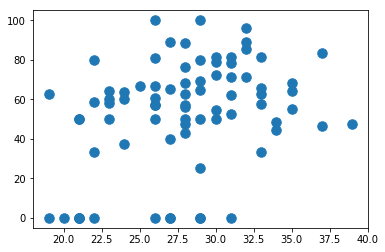

In [151]:
plt.scatter(df_titles.iloc[:, 0], df_titles.iloc[:, 16], s=90);

In [149]:
df_titles.iloc[:, 16]


0       81.6
1       96.0
2       50.0
3       78.9
4       88.9
5       83.3
7       66.7
8       57.7
9       72.5
10      33.3
11       0.0
12      58.8
13      76.2
15      50.0
16      54.5
17     100.0
18      57.1
19      57.1
20      88.5
21      63.6
22      40.0
23      88.9
24      62.5
25      64.3
26       0.0
27      37.5
28       0.0
30      44.4
31      55.2
32      85.7
       ...  
53      57.1
54      62.2
55      60.9
56      80.0
57     100.0
58      65.9
59      60.0
60      50.0
61      46.7
62       0.0
63      62.5
65      64.3
66       0.0
67      62.9
69      66.7
70      60.0
71      68.2
75       0.0
76       0.0
77      81.3
80      47.4
82      33.3
83      81.5
85       0.0
86      81.0
91      50.0
93      42.9
95      71.4
98      50.0
100     47.4
Name: Davis_Cup, Length: 78, dtype: float64

In [142]:
df_titles.iloc[:, 16].shape

(78,)

In [241]:
 kmeans = KMeans(n_clusters=2, random_state=0).fit(df_titles)
    